# Homework 4 - Enis Becirbegovic

***Quicksort*** - algorithm 

In this Mini Programming Assignment, we will implement a quicksort algorithm and compare the computation with other sorting algorithms. We will begin with the base code in Chapter 4 of Grokking Algorithms (Bhargava 2016).

https://github.com/egonSchiele/grokking_algorithms/tree/master/04_quicksort/

In [7]:
import string
import copy
import numpy as np
import pandas as pd
import timeit
import inspect
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
sns.set()

In [8]:
def quicksort(array):
    if len(array) < 2:
        # base case, arrays with 0 or 1 element are already "sorted"
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all the elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all the elements greater than the pivot
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 13, 7, 8, 1, 15, 12, 8]))

[1, 2, 5, 7, 8, 8, 10, 12, 13, 15]


# 1.

Set up five lists of randomly generated strings of characters (i.e. a-z or A-Z e.g. abcdefkjklkjlkjlkjkljlkjlkjlkjkljasdfgtredghjkiuyt). Each string should be 50 characters long. The first list should have 200 strings (each string should be 50 characters long), second should have 400 strings (again each string is 50 characters), third 600 (same length strings i.e. 50 characters), fourth 800 (string length continues to be 50 characters), and last/fifth 1000 strings (yes 50 characters in each string). 

In [9]:
letters = string.ascii_lowercase
r_string =  ''.join(random.choice(letters) for i in range(50)) 
 
 
def list_of_random_string(size ):
    l = []
    i = 1
    while len(l) < size:
        random.seed(i)
        r_string = ''.join(random.choice(letters ) for i in range(50))
        if r_string not in l:    
            l.append(r_string)
        i +=1 
    return l

l_200 =  list_of_random_string(200)
l_400 =  list_of_random_string(400)
l_600 =  list_of_random_string(600)
l_800 =  list_of_random_string(800)
l_1000 =  list_of_random_string(1000)

all_list = [l_200, l_400,l_600, l_800,l_1000]

# Discussion:

Set up five lists of randomly generated strings. The string size is 50 with a list size of 200, 400, 600, 800, 1000. 

# 2. 

You may use the code we used in previous homework assignments.  Make sure the list is unsorted and does not contain any duplicates.

In [20]:
#https://www.geeksforgeeks.org/python-check-if-list-is-sorted-or-not/
for li in all_list:
    flag = 0
    li1 = li[:] 
    li1.sort() 
    if (li1 == li): 
        flag = 1
    # printing result 
    if (flag) : 
        print (str(len(li)), "size list. Yes, List is sorted.") 
    else : 
        print (str(len(li)), "size list. No, List is not sorted.") 
    
print("\n")
        
for li in all_list:
    flag = 0
    li1 = li[:] 
    li2 = set(li) 
    if (len(li1) == len(li2)): 
        flag = 1
    # printing result 
    if (flag) : 
        print (str(len(li)), "size list. List has no duplicates.") 
    else : 
        print (str(len(li)), "size list. List has duplicates.") 

200 size list. No, List is not sorted.
400 size list. No, List is not sorted.
600 size list. No, List is not sorted.
800 size list. No, List is not sorted.
1000 size list. No, List is not sorted.


200 size list. List has no duplicates sorted.
400 size list. List has no duplicates sorted.
600 size list. List has no duplicates sorted.
800 size list. List has no duplicates sorted.
1000 size list. List has no duplicates sorted.


# Discussion

In this code section, we are checking if random lists are sorted already and whether they have duplicates elements.   

# 3.

Use the textbook implementation of quicksort to sort the data, being sure to capture the amount of time it takes for each list. 

200 0.00048102800792548805
400 0.0009790119947865605
600 0.0015675789909437299
800 0.002393089991528541
1000 0.0027442669961601496


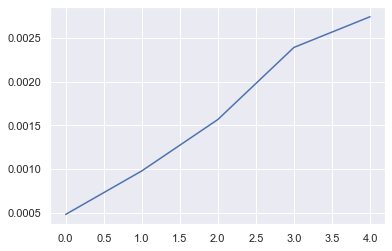

In [29]:
import time
stored_times_quick  = []
for l in all_list:
    l_copy = copy.deepcopy(l)
    start = time.perf_counter()
    quicksort(l) 
    end = time.perf_counter()
    total_time2 = end-start
    stored_times_quick.append(total_time2)    
    print(len(l), total_time2)
pd.Series(stored_times_quick).plot()

# Discussion:

Here I used ***quick sort*** algorithm to sort 200, 400, 600, 800, and 1000 random string. In the process, I made a copy of the original list. The code for quicksort does not change the order of the original list but making a copy helps the code readability in later sections.  

# 4. 

Now use at least two other sorting algorithms on the same data set (e.g. merge sort, bubble sort, insertion sort, etc).  Make sure that you code the sorting algorithm and you do not use a builtin function. By this I mean you may not use np.sort() or sorted(), etc.  You must code the algorithm in order to compare the complexity of each.  Here is a good resource https://www.geeksforgeeks.org/sorting-algorithms/ (Links to an external site.)).  Capture the computation time for each list using each sorting algorithm that you have used. 

200 0.0010919060005107895
400 0.002277965992107056
600 0.004635804012650624
800 0.00510121499246452
1000 0.0069262640026863664


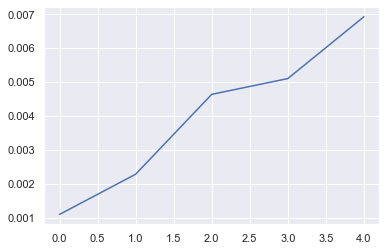

In [23]:
# https://www.geeksforgeeks.org/merge-sort/
def merge_sort(values): 
  
    if len(values)>1: 
        m = len(values)//2
        left = values[:m] 
        right = values[m:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values =[] 
  
        while len(left)>0 and len(right)>0: 
            if left[0]<right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values 

stored_times_merge  = []

for l in all_list:
    l_copy = copy.deepcopy(l)
    start = time.perf_counter()
    merge_sort(l_copy) 
    end = time.perf_counter()
    total_time2 = end-start
    stored_times_merge.append(total_time2)    
    print(len(l), total_time2)
pd.Series(stored_times_merge).plot() 

200 0.0031815660040592775
400 0.007841020007617772
600 0.01321175298653543
800 0.012819969007978216
1000 0.017239801993127912


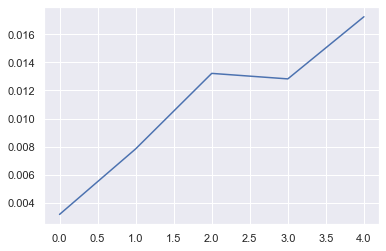

In [24]:
# https://www.geeksforgeeks.org/insertion-sort/

# Function to do insertion sort 
def insertionSort(arr): 
  
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
  
        key = arr[i] 
  
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 
        
stored_times_insertion  = []

for l in all_list:
    l_copy = copy.deepcopy(l)
    start = time.perf_counter()
    merge_sort(l_copy) 
    end = time.perf_counter()
    total_time2 = end-start
    stored_times_insertion.append(total_time2)    
    print(len(l), total_time2)
pd.Series(stored_times_insertion).plot()   
 

# Discussion: 

For comparison I used ***merge sort*** and ***insertion sort*** sorting algorithms. Each previous block cell shows the implementation of two algorithms in Python. The section (#5) graphs and compares the three algorithm and their run times. 

# 5. 

Create a table containing each algorithm and the timings for each list.  Provide a graph showing how each algorithm scales with size of list (also compare the algorithms themselves).  Discuss your findings with explanations for what you observe.  

In [30]:
size = [200,400,600,800,1000]

In [31]:
results = pd.DataFrame([size,stored_times_quick,stored_times_bubble,stored_times_merge,stored_times_insertion]).T
results.columns = ['size','quick','bubble','merge','insertion']

In [32]:
results

,size,quick,bubble,merge,insertion
0,200.0,0.000481,0.005174,0.001092,0.003182
1,400.0,0.000979,0.024107,0.002278,0.007841
2,600.0,0.001568,0.062714,0.004636,0.013212
3,800.0,0.002393,0.134691,0.005101,0.012820
4,1000.0,0.002744,0.181588,0.006926,0.017240


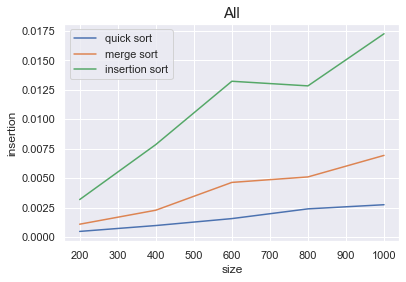

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax2 = plt.twinx()
sns.lineplot(data=results, x="size", y="quick",label='quick sort') 
# sns.lineplot(data=results, x="size", y="bubble",label='bubble sort' )
sns.lineplot(data=results, x="size", y="merge",label='merge sort' )

sns.lineplot(data=results, x="size", y="insertion",label='insertion sort' )


ax1.grid(True)
ax1.legend(loc='upper left' )
plt.title('All',fontsize= 15);

# Discussion:
    
This section aggregates the data and compares the results of three algorithms graphically. I will discuss the impact and the expectation in the executive summary section.   


# Executive Summary

In this exercise, we compared the execution time of ***quick sort*** algorithm for sorting data, and compare the results to ***merge sort*** and ***insert sort***. 

The methodology consist of the following steps:

1. Set up 5 lists of a randomly generated string with the size of 200,400,600,800,1000
2. check for duplicates and whether the lists are sorted  
3. run quick sort on the 5 lists items measure and record time 
4. run the same logic with the python implementation of merge sort and insert sort 
5. compare and graph the results 

 
For this exercise, I measured the start and end time using time.perf_counter() utility in python. The total time is calculated using the difference between end and start time (end-start). The following  graph shows the quicksort  algorithm execution time in Python:

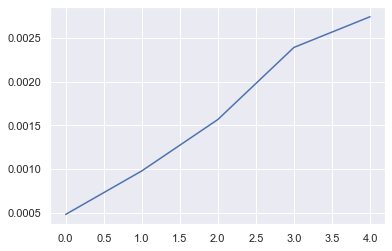

 
Big O for ***quicksort*** is O(n log n) for an average case and O(n$^2$) for the worst case. The difference between the average case and the worst case depends on the pivot point selection. In the graph, we can observe quicksort taking shape of O(n$^2$) or its worst case (with the small kink at the end of the specturum which could be due to random spikes in CPU performance). It means that in the case above we are likely approaching the worst-case scenario for this algorithm. 

#### Comparison

In this section, we will compare the sorting time of quicksort to merge sort and insertion sort. The plot of the algorithms can be shown below:

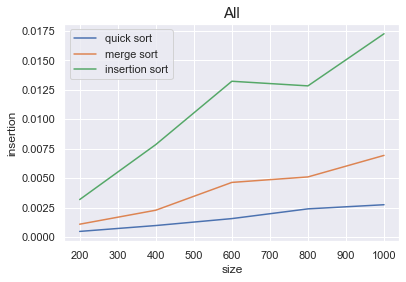

First, we compare ***quicksort*** and ***merge sort***. We already mentioned that Big O (worst case) of quicksort is O(n$^2$). For merge sort, the big O is  O(n log n). On the surface, we would conclude that the merge sort is the faster algorithms and the more efficient one. However, the graph shows that ***merge sort*** is a slower algorithm. Even though it appears that ***merge sort*** is a more efficient algorithm the total time of execution is higher becuase of the higher constant time (c) it takes to execute one loop.

***Insertion sort*** has the worst case big O of  O(n$^2$). This is very similar to a big O of quicksort. Here again, the graph shows that insertion sort is significantly slower compared to quick sort even though the big O of the two is identical. This again has to do with constant time (C) of a single loop. 


Bhargava (2016) Chapter 4.